In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
import folium
db=mysql.connector.connect(host='localhost',
                               username='root',
                               password='1234',
                               database='delhimetro')
cur=db.cursor()

# Plot Metro stations with markers on map

In [60]:
line_colors={
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}
query = """SELECT station_name, line, latitude, longitude FROM delhimetro"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['Station_name', 'Line', 'Latitude', 'Longitude'])
map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)
for index, row in df.iterrows():
    lat = float(row['Latitude'])
    lon = float(row['Longitude'])
    line = row['Line']
    coords = (lat, lon)
    color = line_colors.get(line)
    folium.Marker(location=coords,
        popup=f"{row['Station_name']} ({row['Line']})",
                  icon=folium.Icon(color=color)
    ).add_to(map)
map

# No of Metro Stations opening per year

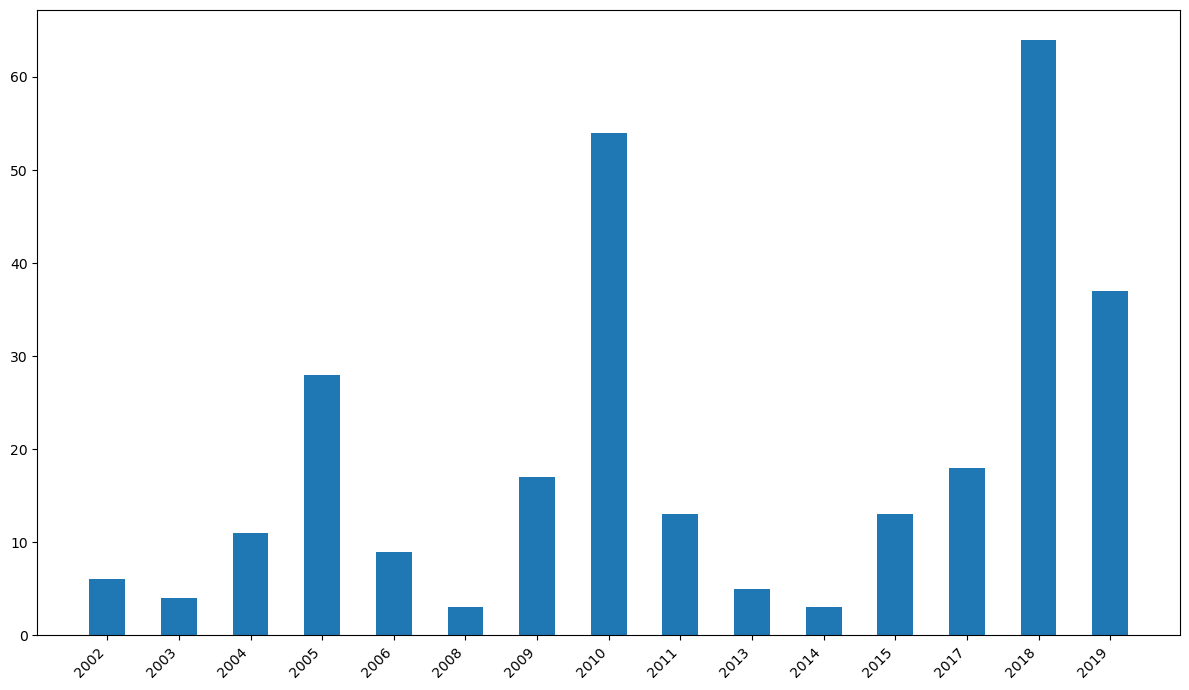

In [53]:
query="""select year(opening_date),count(opening_date) from delhimetro 
group by year(opening_date) order by year(Opening_Date)"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Year','stationsopened'])
df['Year'] = df['Year'].astype(str)
x=df['Year']
y=df['stationsopened']
plt.figure(figsize=(12, 7))
plt.bar(x,y,width=0.5)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# No of Stations per Metro Line

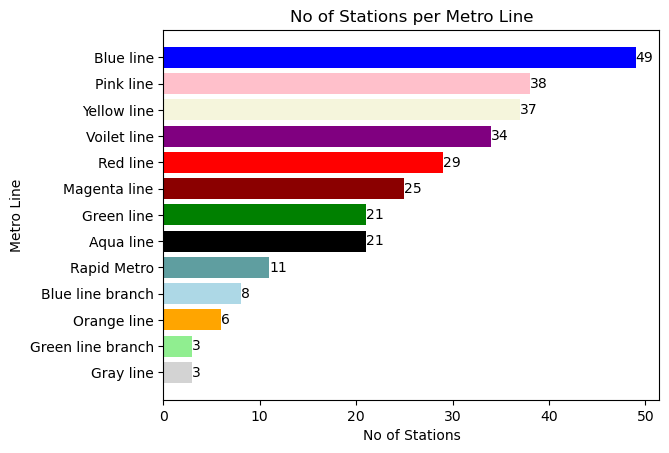

In [113]:
query="""select distinct(line), count(station_name) from delhimetro
group by Line order by count(Station_Name) asc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Metro_line','No_of_stations'])
barh=plt.barh(df['Metro_line'],df['No_of_stations'],color=['lightgray','lightgreen','orange','lightblue','cadetblue',
         'black','green','darkred','red','purple','beige','pink','blue'])
plt.bar_label(barh, labels=df['No_of_stations'])
plt.title('No of Stations per Metro Line')
plt.xlabel('No of Stations')
plt.ylabel('Metro Line')
plt.show()

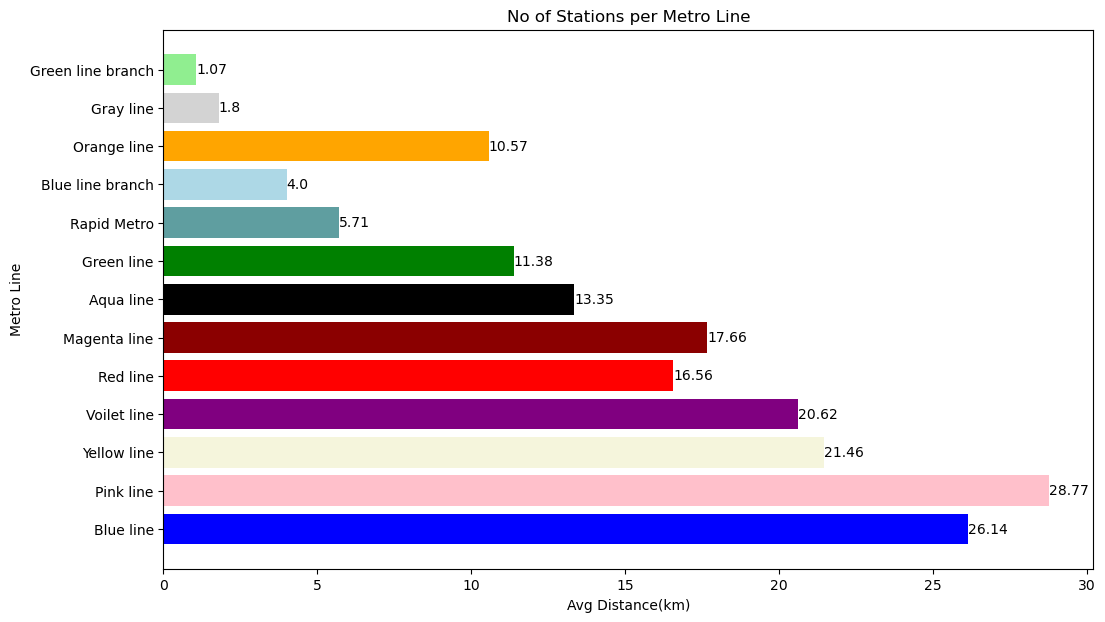

In [115]:
query="""select distinct(line), round(avg(Distance_from_Start),2) from delhimetro
group by Line order by count(Station_Name) desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Metro_line','Avg Distance'])
plt.figure(figsize=(12, 7))
barh=plt.barh(df['Metro_line'],df['Avg Distance'],color=['blue','pink','beige','purple','red',
         'darkred','black','green','cadetblue','lightblue','orange','lightgray','lightgreen'])
plt.bar_label(barh, labels=df['Avg Distance'])
plt.title('No of Stations per Metro Line')
plt.xlabel('Avg Distance(km)')
plt.ylabel('Metro Line')
plt.show()

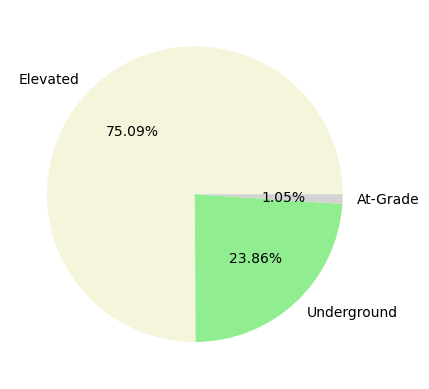

In [121]:
query="""with a as (select distinct(station_layout) station_layout1,count(station_layout) as no_station
from delhimetro group by Station_Layout)
select station_layout1,no_station,no_station*100/sum(no_station)
over () as percentage from a order by no_station desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Station_Layout','station_count','Percentage'])
value=df['Percentage']
legend=df['Station_Layout']
plt.pie(value,labels=legend,autopct="%2.2f%%",colors=['beige','lightgreen','lightgray'])
plt.show()